# **CS M148 Project Submission**

#Preparation

In [ ]:
%pip install scikit-lego

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklego.linear_model import LADRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import cross_val_score

# Clean Data and EDA

In [ ]:
spotify_data = pd.read_csv('dataset.csv', index_col = 0)
pd.set_option('display.max_columns', None)
spotify_data

track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700

In [ ]:
spotify_data.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [ ]:
spotify_data.select_dtypes('number').describe()

popularity   duration_ms   danceability         energy  \
count  114000.000000  1.140000e+05  114000.000000  114000.000000   
mean       33.238535  2.280292e+05       0.566800       0.641383   
std        22.305078  1.072977e+05       0.173542       0.251529   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        5.309140      -8.258960       0.637553       0.084652   
std         3.559987       5.029337       0.480709       0.105732   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  114000.000000     114000.000000  114000.000000  114000.000000   
mean        0.314910          0.156050       0.213553       0.474068   
std         0.332523          0.309555       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.598000          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature  
count  114000.000000   114000.000000  
mean      122.147837        3.904035  
std        29.978197        0.432621  
min         0.000000        0.000000  
25%        99.218750        4.000000  
50%       122.017000        4.000000  
75%       140.071000        4.000000  
max       243.372000        5.000000

In [ ]:
spotify_data.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
spotify_data = spotify_data.dropna()

In [ ]:
spotify_data.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

*italicised text*

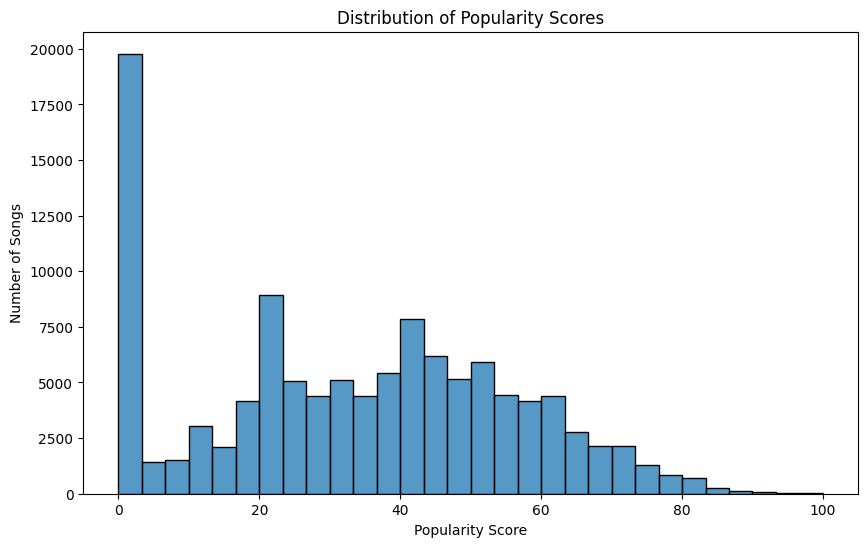

In [ ]:
# Distribution of Popularity Score
plt.figure(figsize=(10, 6))
sns.histplot(spotify_data['popularity'], bins=30)
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Songs')
plt.show()

In [ ]:
spotify_df = spotify_data['popularity'] > 70
spotify_df.value_counts()
print(4846/109153)

0.044396397716966095


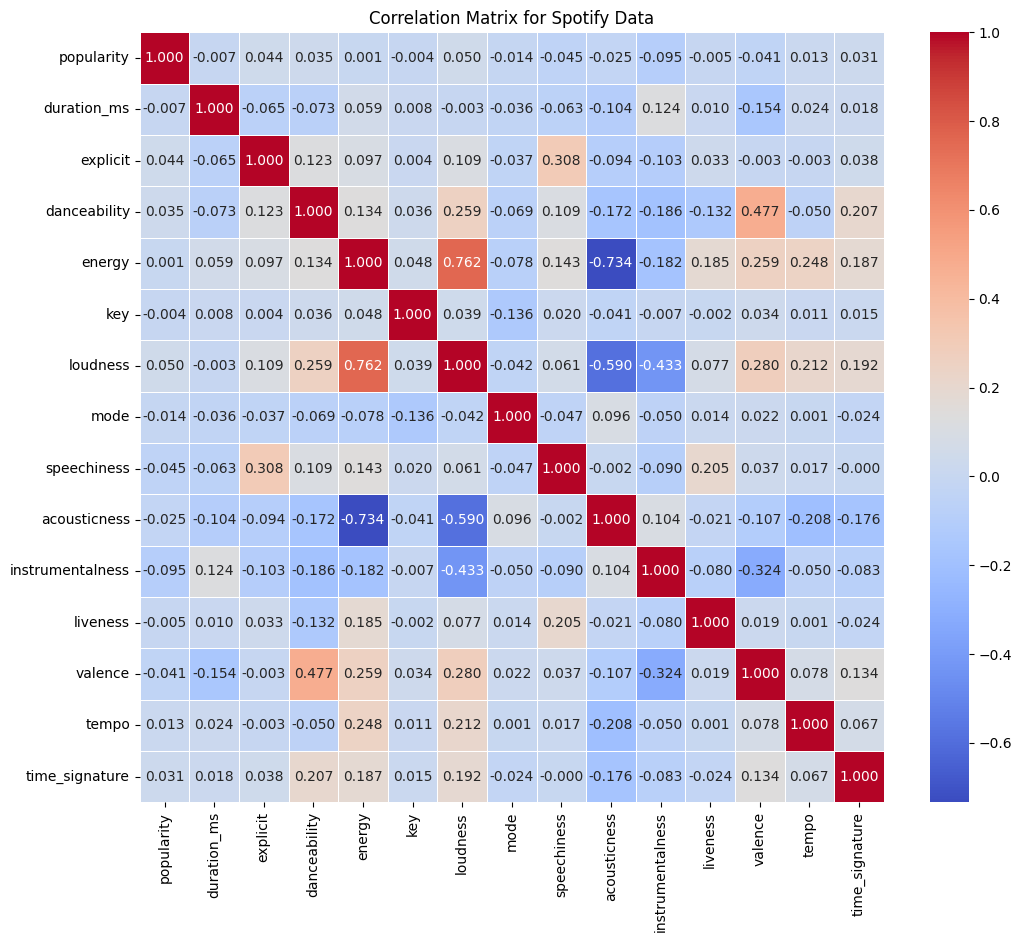

In [ ]:
# Correlation Matrix
corr_matrix = spotify_data.corr(numeric_only=True)

# plotting correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, linewidths=0.5, fmt=".3f")
plt.title("Correlation Matrix for Spotify Data")
plt.show()

In [ ]:
numeric_cols = spotify_data.select_dtypes(include=[np.number]).columns.tolist()

print(numeric_cols)

['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


Given the correlation map above, the top numeric variables that seem to be most correlated with popularity are loudness (0.05), dancability (0.035),
speechiness (-0.045), instrumentalness (-0.095).


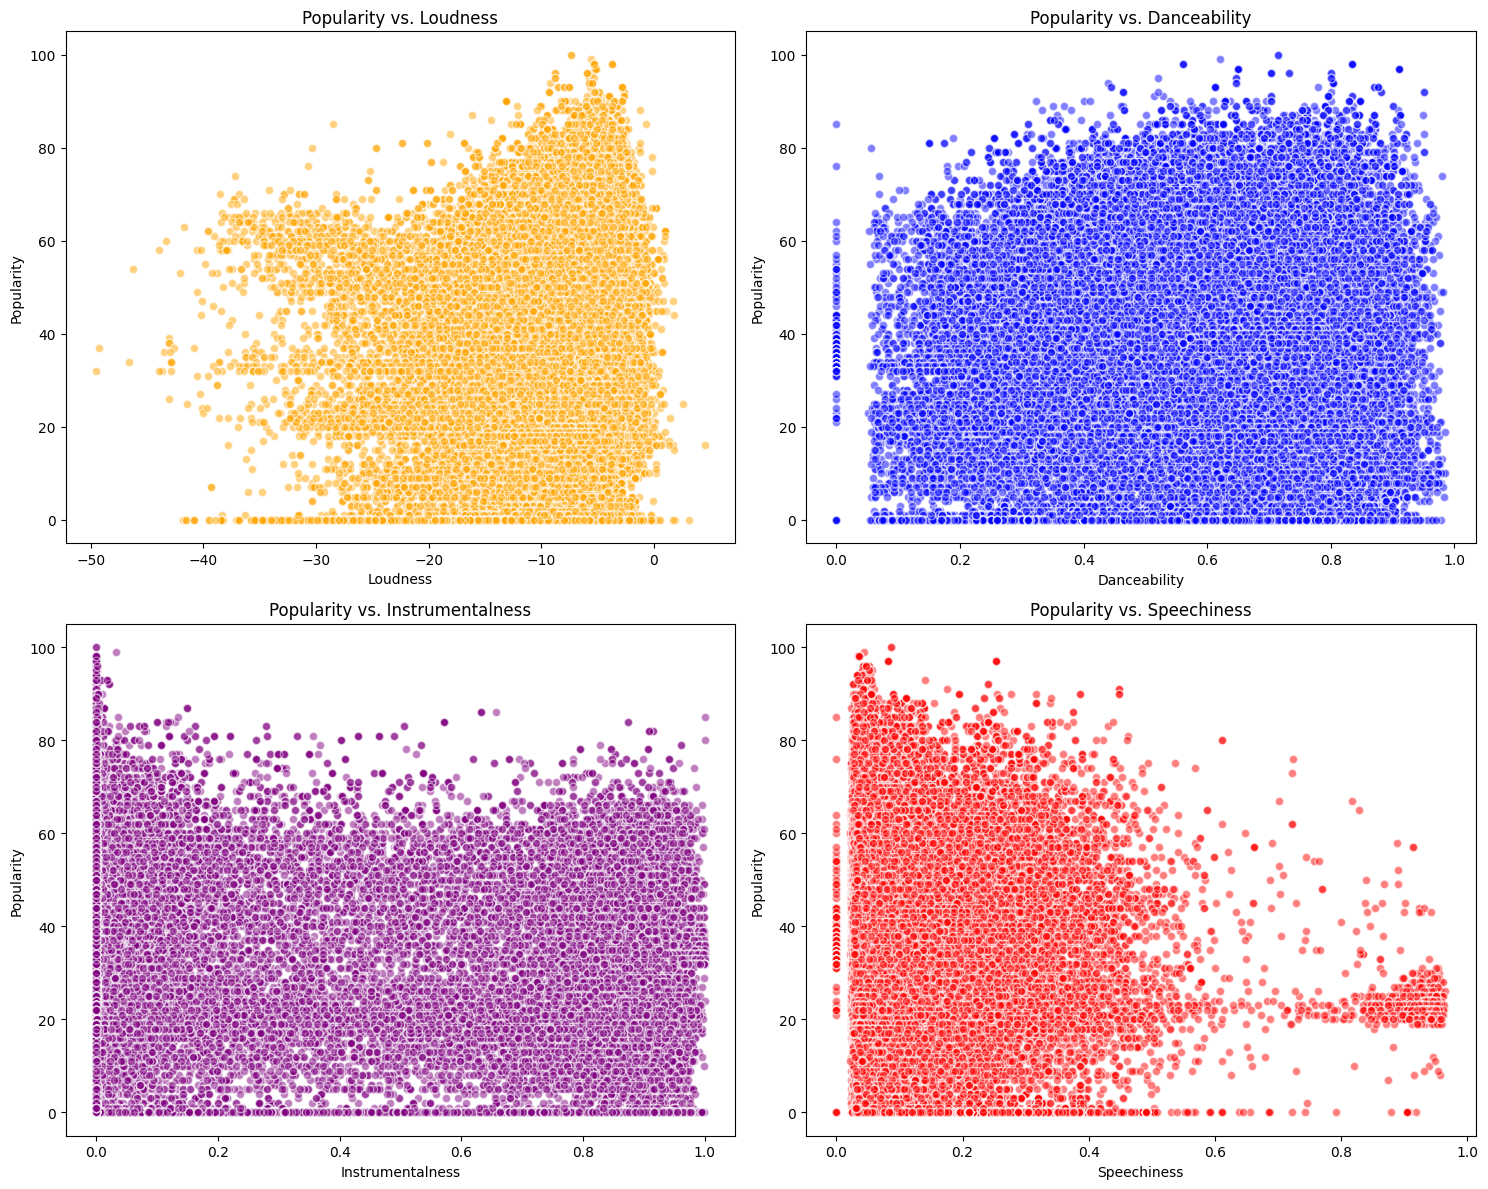

In [ ]:
# Scatter plots to visualize relationships with popularity
plt.figure(figsize=(15, 12))

# Popularity vs. Loudness
plt.subplot(2, 2, 1)
plt.scatter(spotify_data['loudness'], spotify_data['popularity'], alpha=0.5, color='orange', edgecolors='w')
plt.title('Popularity vs. Loudness')
plt.xlabel('Loudness')
plt.ylabel('Popularity')


# Popularity vs. Danceability
plt.subplot(2, 2, 2)
plt.scatter(spotify_data['danceability'], spotify_data['popularity'], alpha=0.5, color='blue', edgecolors='w')
plt.title('Popularity vs. Danceability')
plt.xlabel('Danceability')
plt.ylabel('Popularity')

# Popularity vs. Instrumentalness
plt.subplot(2, 2, 3)
plt.scatter(spotify_data['instrumentalness'], spotify_data['popularity'], alpha=0.5, color='purple', edgecolors='w')
plt.title('Popularity vs. Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')

# Popularity vs. Speechiness
plt.subplot(2, 2, 4)
plt.scatter(spotify_data['speechiness'], spotify_data['popularity'], alpha=0.5, color='red', edgecolors='w')
plt.title('Popularity vs. Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Popularity')

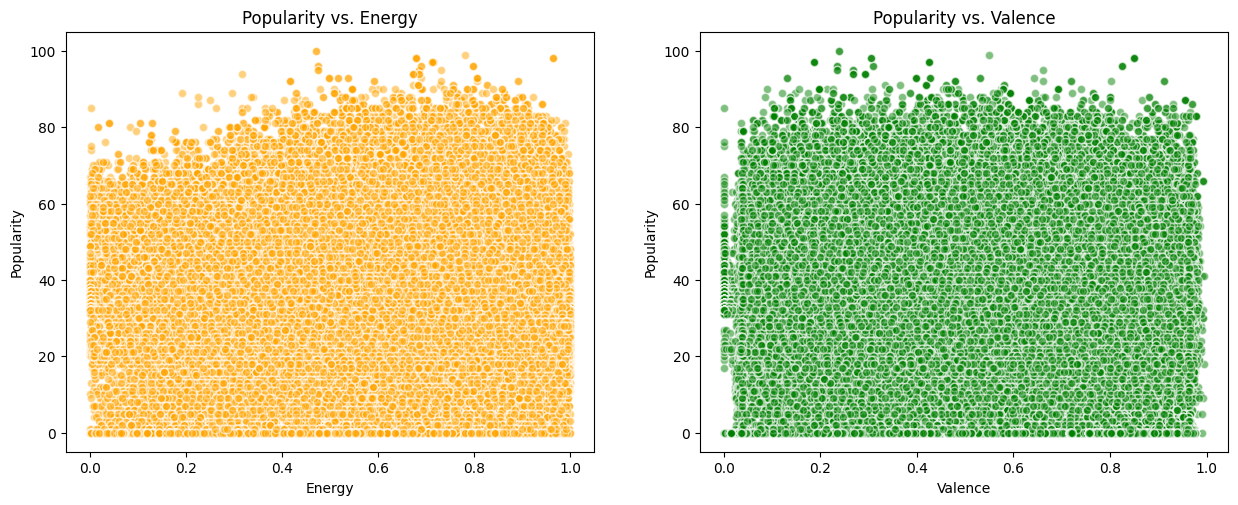

In [ ]:
# More explorations of variables we found interesting
plt.figure(figsize=(15, 12))

# Popularity vs. Energy
plt.subplot(2, 2, 1)
plt.scatter(spotify_data['energy'], spotify_data['popularity'], alpha=0.5, color='orange', edgecolors='w')
plt.title('Popularity vs. Energy')
plt.xlabel('Energy')
plt.ylabel('Popularity')

# Popularity vs. Valence
plt.subplot(2, 2, 2)
plt.scatter(spotify_data['valence'], spotify_data['popularity'], alpha=0.5, color='green', edgecolors='w')
plt.title('Popularity vs. Valence')
plt.xlabel('Valence')
plt.ylabel('Popularity')

In [ ]:
# create a Popular Dataset vs a Nonpopular Dataset
spotify_popular = spotify_data.copy()[spotify_data['popularity'] > 70]
spotify_nonpopular = spotify_data.copy()[spotify_data['popularity'] <= 70]

In [ ]:
print(spotify_popular.shape)
print(spotify_nonpopular.shape)

(4846, 20)
(109153, 20)


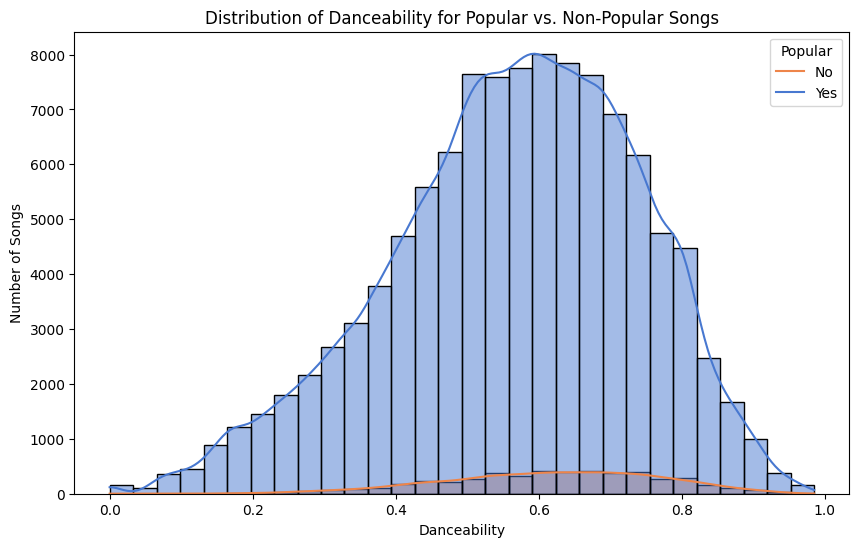

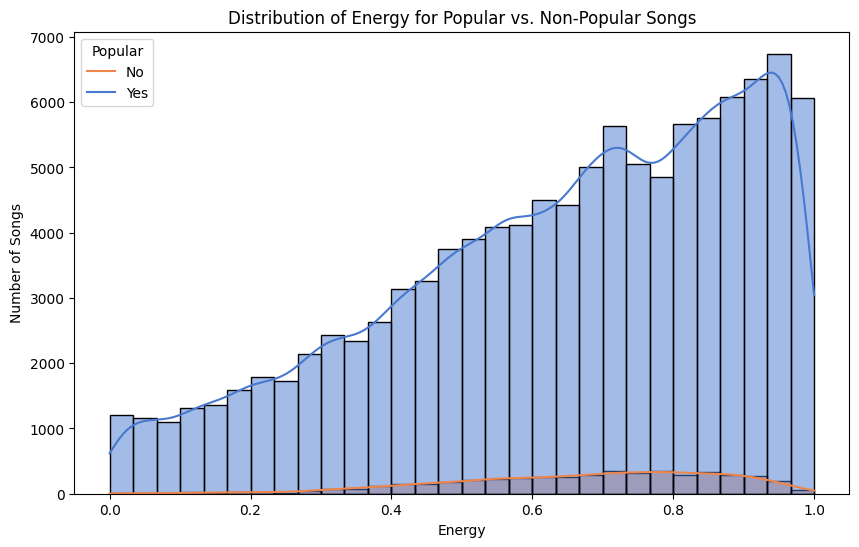

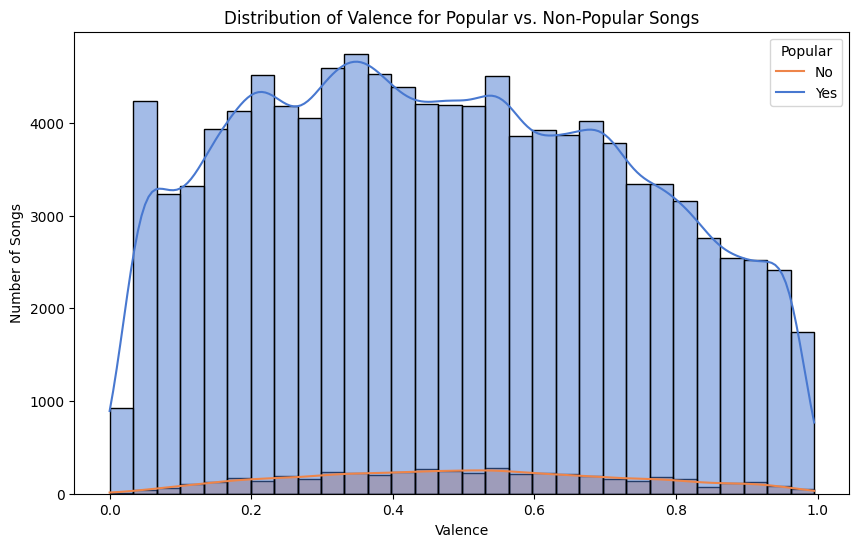

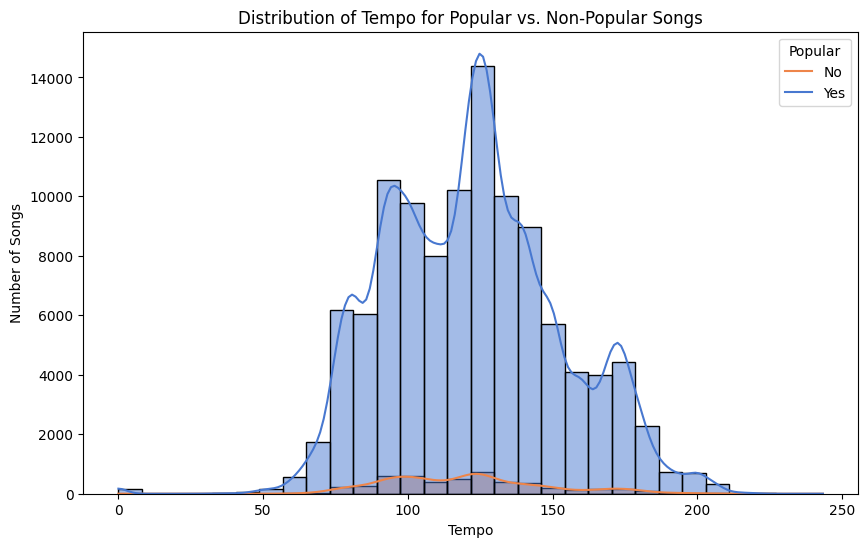

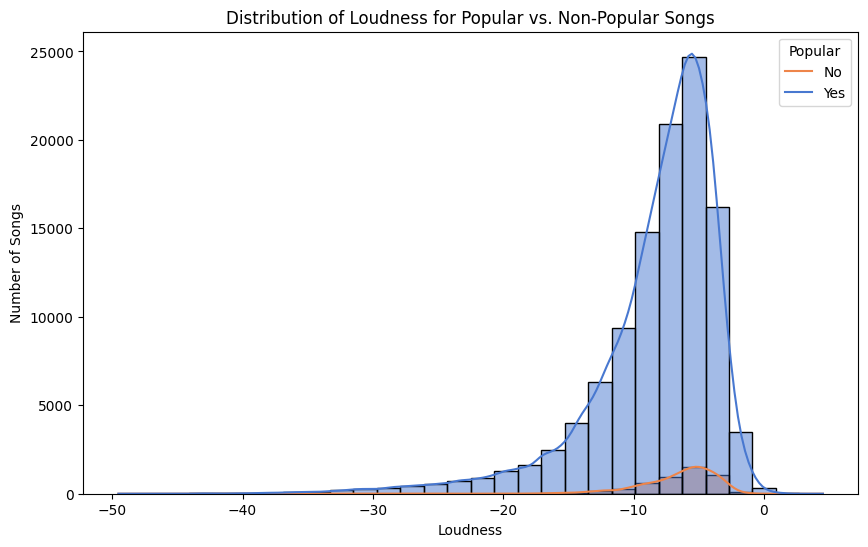

In [ ]:
#Compare Distributions of Interesting Features for Popular and Non-Popular Songs
features_to_plot = ['danceability', 'energy', 'valence', 'tempo', 'loudness']

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=spotify_data, x=feature, hue=spotify_data['popularity'] > 70, bins=30, kde=True, palette='muted')
    plt.title(f'Distribution of {feature.capitalize()} for Popular vs. Non-Popular Songs')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Number of Songs')
    plt.legend(title='Popular', labels=['No', 'Yes'])
    plt.show()

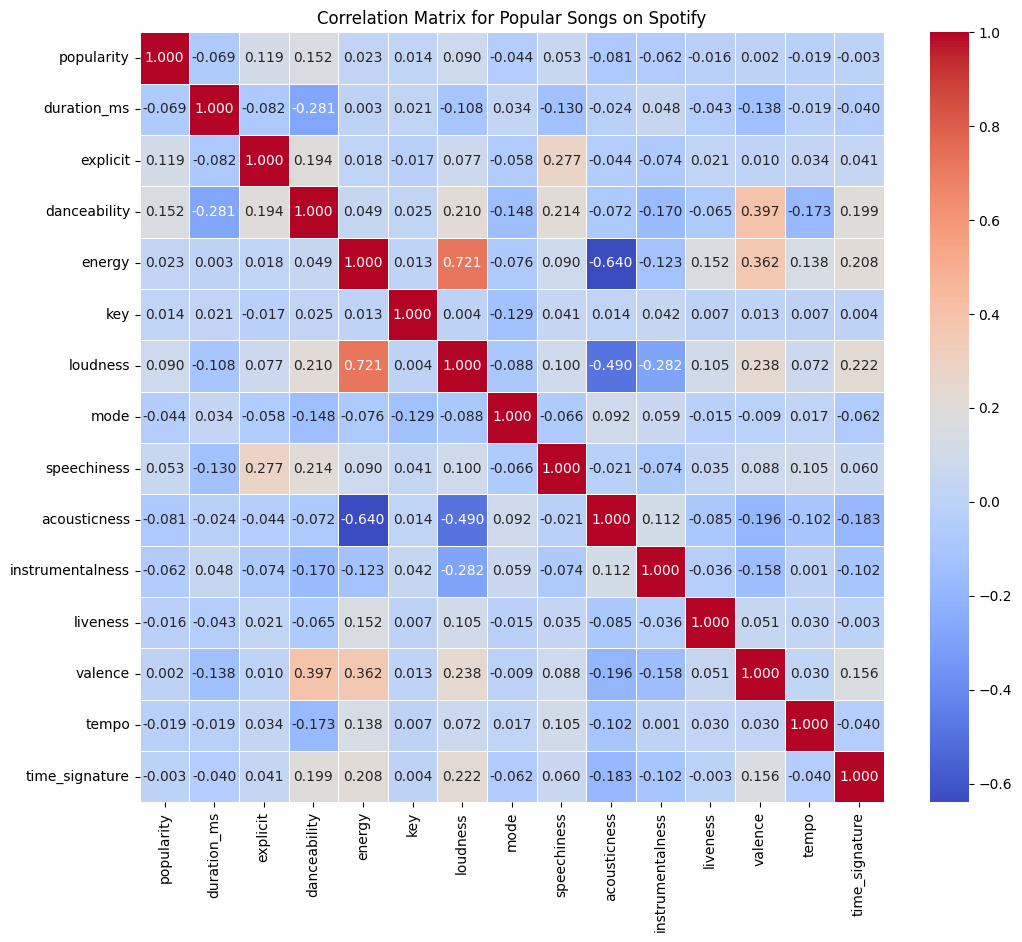

In [ ]:
# Correlation Matrix
corr_matrix = spotify_popular.corr(numeric_only=True)

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, linewidths=0.5, fmt=".3f")
plt.title("Correlation Matrix for Popular Songs on Spotify")
plt.show()

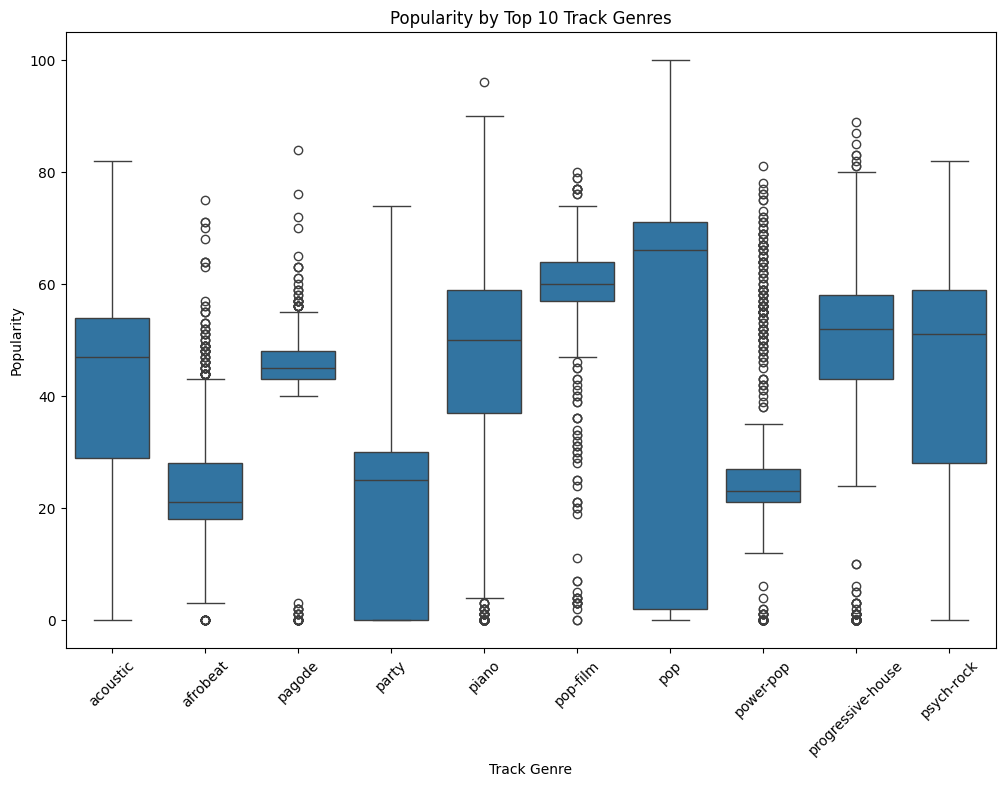

In [ ]:
# Top 10 genres by frequency
top_genres = spotify_data['track_genre'].value_counts().head(10).index

# Box plot: Popularity by Top 10 Track Genres
plt.figure(figsize=(12, 8))
sns.boxplot(data=spotify_data[spotify_data['track_genre'].isin(top_genres)], x='track_genre', y='popularity')
plt.title('Popularity by Top 10 Track Genres')
plt.xticks(rotation=45)
plt.xlabel('Track Genre')
plt.ylabel('Popularity')
plt.show()

# Spitting the Data

In [ ]:
X = spotify_data.drop(columns=['popularity'])
y = spotify_data['popularity']

# split data into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
# split training into 20% validation
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Linear Regression Analysis

In [ ]:
# Initialize variables
selected_features = []
best_mse = float('inf')

desired_num_features = 4

# Forward selection loop
while len(selected_features) < desired_num_features:
    best_feature = None
    for feature in X_train.columns:
        if feature not in selected_features:
            candidate_features = selected_features + [feature]
            model = LinearRegression().fit(X[candidate_features], y)
            mse = mean_squared_error(y_train, model.predict(X_train[candidate_features]))
            if mse < best_mse:
                best_mse = mse
                best_feature = feature

    if best_feature:
        selected_features.append(best_feature)
        print(f"Selected feature: {best_feature}, MSE: {best_mse}")
    else:
        break

print(f"Final selected features: {selected_features}")

Selected feature: instrumentalness, MSE: 493.2025244155817
Selected feature: valence, MSE: 490.2383082965033
Selected feature: danceability, MSE: 488.57588939121854
Selected feature: speechiness, MSE: 486.78032688897224
Final selected features: ['instrumentalness', 'valence', 'danceability', 'speechiness']


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     859.1
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          5.85e-188
Time:                        02:31:01   Log-Likelihood:            -4.1216e+05
No. Observations:               91199   AIC:                         8.243e+05
Df Residuals:                   91197   BIC:                         8.244e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               34.3882      0.082  

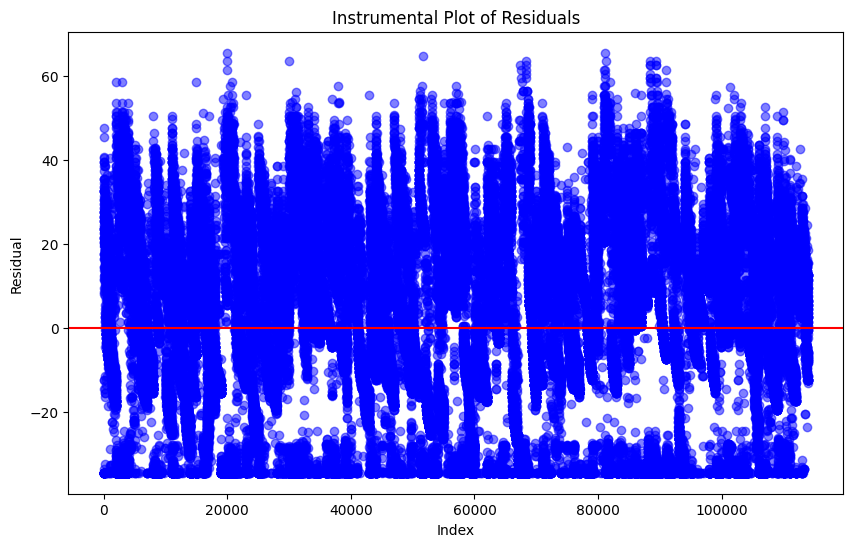

In [ ]:
# Linear Regression Model of Instrumentalness
X_train_instrumentalness = X_train[['instrumentalness']]
X_train_instrumentalness = sm.add_constant(X_train_instrumentalness)

# Fitting the model
model = sm.OLS(y_train, X_train_instrumentalness)
results = model.fit()

print(results.summary())

predictions = results.predict(X_train_instrumentalness)
residuals = y_train - predictions

results_linr_df = pd.DataFrame({
    'Predicted': predictions,
    'Actual': y_train,
    'Residual': residuals
})

plt.figure(figsize=(10, 6))
plt.scatter(results_linr_df.index, results_linr_df['Residual'], color='blue', alpha=0.5)
plt.title('Instrumental Plot of Residuals')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     159.0
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.98e-36
Time:                        02:31:05   Log-Likelihood:            -4.1251e+05
No. Observations:               91199   AIC:                         8.250e+05
Df Residuals:                   91197   BIC:                         8.250e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0016      0.154    227.422      0.0

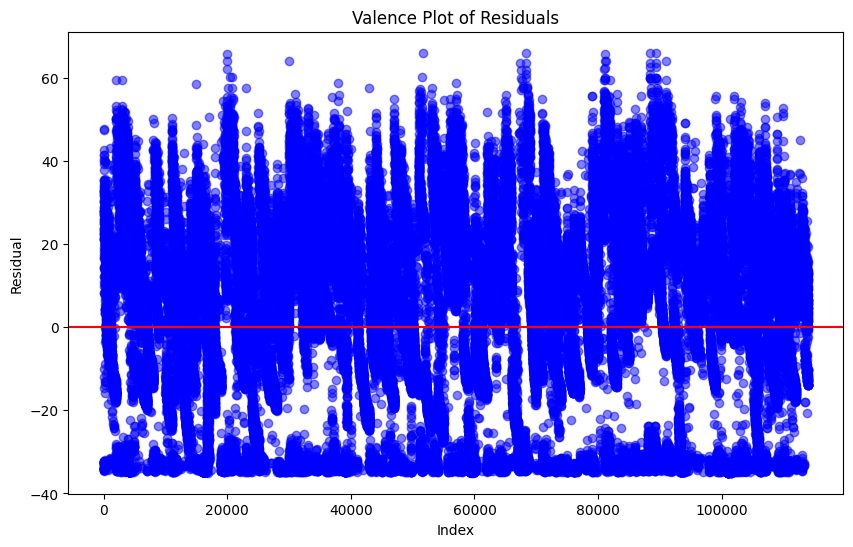

In [ ]:
# Linear Regression Model of Valence
X_train_valence = X_train[['valence']]
X_train_valence = sm.add_constant(X_train_valence)

# Fitting the model
model = sm.OLS(y_train, X_train_valence)
results = model.fit()

print(results.summary())

predictions = results.predict(X_train_valence)
residuals = y_train - predictions

results_linr_df = pd.DataFrame({
    'Predicted': predictions,
    'Actual': y_train,
    'Residual': residuals
})

plt.figure(figsize=(10, 6))
plt.scatter(results_linr_df.index, results_linr_df['Residual'], color='blue', alpha=0.5)
plt.title('Valence Plot of Residuals')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     111.0
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           6.12e-26
Time:                        02:31:08   Log-Likelihood:            -4.1254e+05
No. Observations:               91199   AIC:                         8.251e+05
Df Residuals:                   91197   BIC:                         8.251e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           30.7540      0.253    121.770   

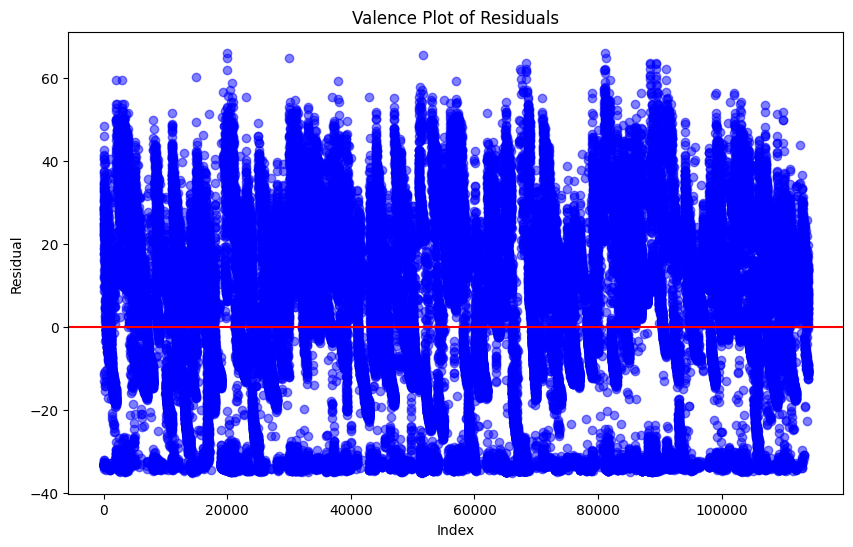

In [ ]:
# Linear Regression Model of Danceability
X_train_danceability = X_train[['danceability']]
X_train_danceability = sm.add_constant(X_train_danceability)

# Fitting the model
model = sm.OLS(y_train, X_train_danceability)
results = model.fit()

print(results.summary())

predictions = results.predict(X_train_danceability)
residuals = y_train - predictions

results_linr_df = pd.DataFrame({
    'Predicted': predictions,
    'Actual': y_train,
    'Residual': residuals
})

plt.figure(figsize=(10, 6))
plt.scatter(results_linr_df.index, results_linr_df['Residual'], color='blue', alpha=0.5)
plt.title('Valence Plot of Residuals')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     188.7
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           6.60e-43
Time:                        02:31:10   Log-Likelihood:            -4.1250e+05
No. Observations:               91199   AIC:                         8.250e+05
Df Residuals:                   91197   BIC:                         8.250e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          34.1116      0.095    360.578      

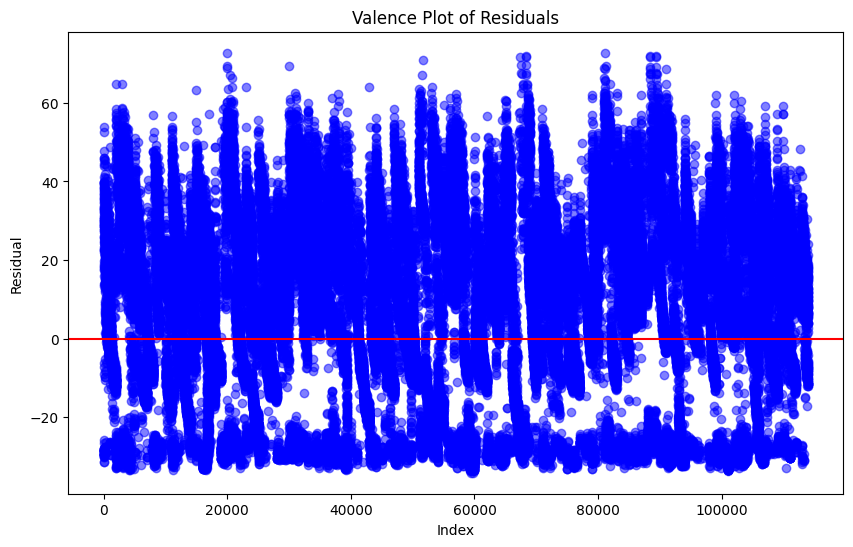

In [ ]:
# Linear Regression Model of Speechiness
X_train_speechiness = X_train[['speechiness']]
X_train_speechiness = sm.add_constant(X_train_speechiness)

# Fitting the model
model = sm.OLS(y_train, X_train_speechiness)
results = model.fit()

print(results.summary())

predictions = results.predict(X_train_danceability)
residuals = y_train - predictions

results_linr_df = pd.DataFrame({
    'Predicted': predictions,
    'Actual': y_train,
    'Residual': residuals
})

plt.figure(figsize=(10, 6))
plt.scatter(results_linr_df.index, results_linr_df['Residual'], color='blue', alpha=0.5)
plt.title('Valence Plot of Residuals')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     518.5
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        02:31:12   Log-Likelihood:            -4.1157e+05
No. Observations:               91199   AIC:                         8.231e+05
Df Residuals:                   91194   BIC:                         8.232e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               35.1801      0.270  

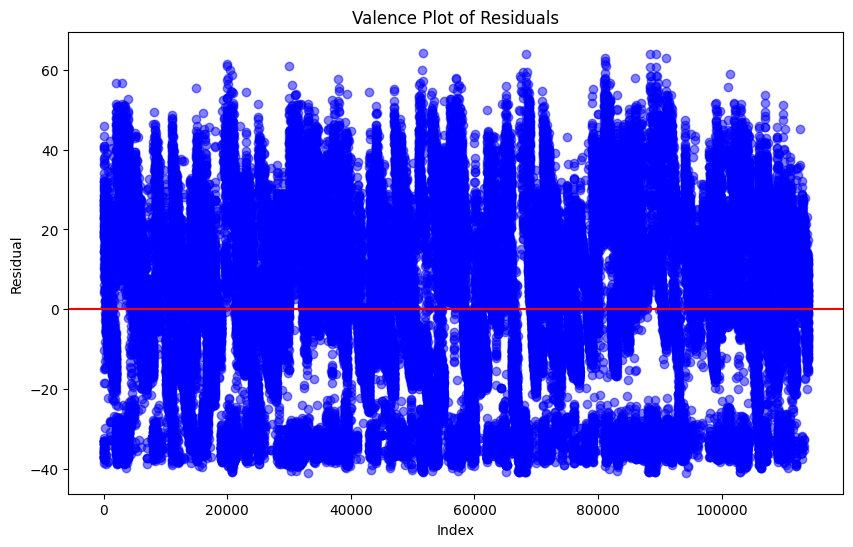

In [ ]:
# Linear Regression Model of Instrumentalness, Valence, Danceability, Speechiness
X_train_multi = X_train[['instrumentalness', 'valence', 'danceability', 'speechiness']]
X_train_multi = sm.add_constant(X_train_multi)

# Fitting the model
model = sm.OLS(y_train, X_train_multi)
results = model.fit()

print(results.summary())

predictions = results.predict(X_train_multi)
residuals = y_train - predictions

results_linr_df = pd.DataFrame({
    'Predicted': predictions,
    'Actual': y_train,
    'Residual': residuals
})

plt.figure(figsize=(10, 6))
plt.scatter(results_linr_df.index, results_linr_df['Residual'], color='blue', alpha=0.5)
plt.title('Valence Plot of Residuals')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Based on our regression analysis of the four predictor variables selected through our forward selection algorithm, we decided that regularization is not necessary. Our R^2 values for all of these models are extremely low.

# Split again for binary classification

In [ ]:
spotify = spotify_data.copy()
spotify['popularity'] = spotify['popularity'] > 70

X = spotify.drop(columns=["popularity", "explicit", "track_genre", "track_id", "artists",
                          "album_name", "track_name", "time_signature", "key", "mode", 'duration_ms'])
y = spotify['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [ ]:
y_train.value_counts()

popularity
False    87322
True      3877
Name: count, dtype: int64

In [ ]:
# fit the model
logistic = LogisticRegression(solver='liblinear')
logistic.fit(X = X_train_scaled,
             y = y_train)

cv_scores = cross_val_score(logistic, X_train_scaled, y_train, cv=5, scoring='accuracy')

# making the prediction
y_test_pred_logr = logistic.predict(X_test_scaled)

pred_val_lr = pd.DataFrame({
    'true': y_test,
    'lr_predict': y_test_pred_logr
})

pred_val_lr.head()

true  lr_predict
101240  False       False
53704    True       False
18405   False       False
36128   False       False
96574   False       False

In [ ]:
print(f"Logistic Regression CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# get the important features
feature_names = selected_features
coefficients = logistic.coef_[0]

# Create a DataFrame for easy visualization
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)

Logistic Regression CV Accuracy: 0.9575 ± 0.0000
            Feature  Coefficient
2          loudness     0.615964
0      danceability     0.217714
7           valence    -0.099977
8             tempo    -0.113357
3       speechiness    -0.140626
6          liveness    -0.281196
4      acousticness    -0.431926
1            energy    -0.456087
5  instrumentalness    -0.674517


[[21831     0]
 [  969     0]]


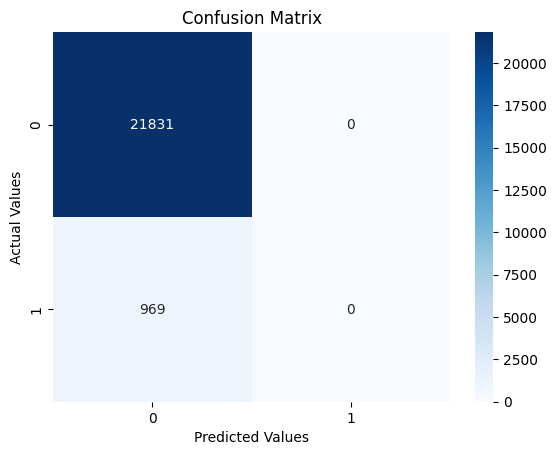

In [ ]:
# Confusion Matrix
conf_lr = metrics.confusion_matrix(y_true=pred_val_lr['true'],
                                   y_pred=pred_val_lr['lr_predict'])
print(conf_lr)

sns.heatmap(conf_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [ ]:
# Confusion Matrix Metrics
lr_accuracy = metrics.accuracy_score(y_true=pred_val_lr['true'],
                       y_pred=pred_val_lr['lr_predict'])

lr_truepositive = metrics.recall_score(y_true=pred_val_lr['true'],
                       y_pred=pred_val_lr['lr_predict'])

lr_truenegative = metrics.recall_score(y_true=pred_val_lr['true'],
                       y_pred=pred_val_lr['lr_predict'],
                                       pos_label=0)

print('Accuracy:', lr_accuracy)
print('True Positive Rate:', lr_truepositive)
print('True Negative Rate:', lr_truenegative)

Accuracy: 0.9575
True Positive Rate: 0.0
True Negative Rate: 1.0


In [ ]:
for i in range (5, 16):

  # Define custom class weights
  custom_class_weights = {0: 1, 1: i}

  # Train logistic regression with custom class weights
  logistic = LogisticRegression(solver='liblinear', class_weight=custom_class_weights)
  logistic.fit(X_train_scaled, y_train)

  # Make predictions on the test set
  y_test_pred = logistic.predict(X_test_scaled)

  # create a DataFrame for easy visualization
  pred_val_lr = pd.DataFrame({
      'true': y_test,
      'lr_predict': y_test_pred
  })

  cv_scores = cross_val_score(logistic, X_train_scaled, y_train, cv=5, scoring='accuracy')
  print("Iteration: ", i)
  print(f"Logistic Regression CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Iteration:  5
Logistic Regression CV Accuracy: 0.9572 ± 0.0001
Iteration:  6
Logistic Regression CV Accuracy: 0.9548 ± 0.0003
Iteration:  7
Logistic Regression CV Accuracy: 0.9513 ± 0.0006
Iteration:  8
Logistic Regression CV Accuracy: 0.9435 ± 0.0010
Iteration:  9
Logistic Regression CV Accuracy: 0.9295 ± 0.0013
Iteration:  10
Logistic Regression CV Accuracy: 0.9086 ± 0.0023
Iteration:  11
Logistic Regression CV Accuracy: 0.8848 ± 0.0026
Iteration:  12
Logistic Regression CV Accuracy: 0.8569 ± 0.0033
Iteration:  13
Logistic Regression CV Accuracy: 0.8269 ± 0.0035
Iteration:  14
Logistic Regression CV Accuracy: 0.7960 ± 0.0043
Iteration:  15
Logistic Regression CV Accuracy: 0.7651 ± 0.0040


Logistic Regression CV Accuracy: 0.9086 ± 0.0023


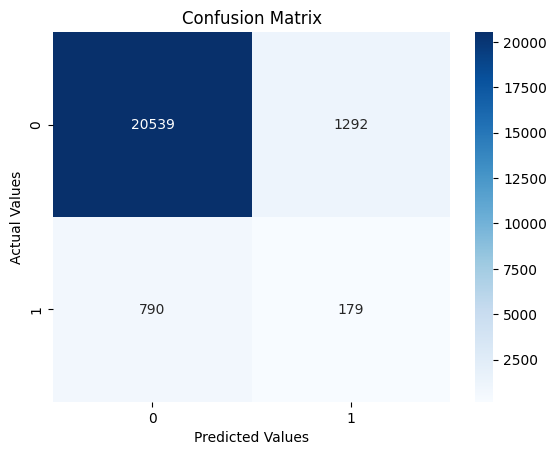

Accuracy: 0.9086842105263158
True Positive Rate: 0.18472652218782248
True Negative Rate: 0.9408181026979983


In [ ]:
# Define custom class weights
custom_class_weights = {0: 1, 1: 10}

# Train logistic regression with custom class weights
logistic = LogisticRegression(solver='liblinear', class_weight=custom_class_weights)
logistic.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_pred = logistic.predict(X_test_scaled)

# create a DataFrame for easy visualization
pred_val_lr = pd.DataFrame({
    'true': y_test,
    'lr_predict': y_test_pred
})

cv_scores = cross_val_score(logistic, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

conf_lr = metrics.confusion_matrix(y_true=pred_val_lr['true'],
                                   y_pred=pred_val_lr['lr_predict'])

sns.heatmap(conf_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

# Confusion Matrix Metrics
lr_accuracy = metrics.accuracy_score(y_true=pred_val_lr['true'],
                       y_pred=pred_val_lr['lr_predict'])

lr_truepositive = metrics.recall_score(y_true=pred_val_lr['true'],
                       y_pred=pred_val_lr['lr_predict'])

lr_truenegative = metrics.recall_score(y_true=pred_val_lr['true'],
                       y_pred=pred_val_lr['lr_predict'],
                                       pos_label=0)

print('Accuracy:', lr_accuracy)
print('True Positive Rate:', lr_truepositive)
print('True Negative Rate:', lr_truenegative)

True Positive went up but True Negative went down.

AUC: 0.7109614058912731


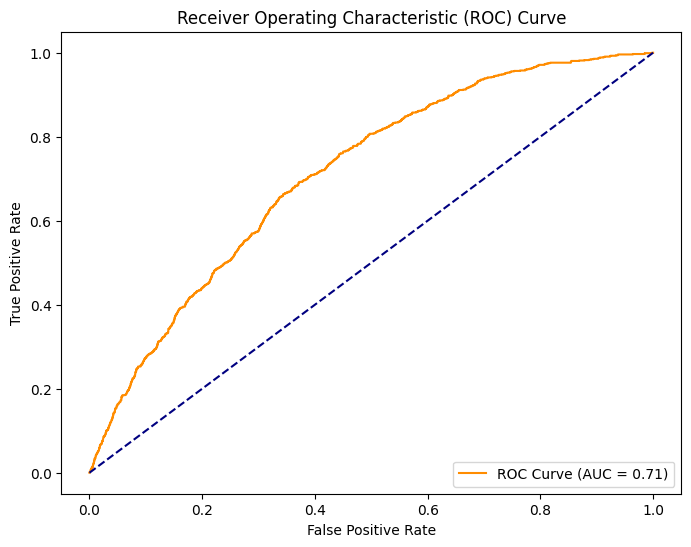

In [ ]:
# Compute the ROC curve
y_test_prob = logistic.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

print("AUC:", roc_auc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Cross Validation

In [ ]:
# from sklearn.model_selection import StratifiedKFold

# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

k_values = [3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"KNN (k={k}) CV Accuracy: {cv_scores.mean():.4f}")

    # for train_index, val_index in skf.split(X_train_scaled, y_train):
    #   print("TRAIN:", train_index, "VAL:", val_index)
    #   X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    #   y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    #   knn.fit(X_train_fold, y_train_fold)
    #   y_val_pred = knn.predict(X_val_fold)
    #   print(classification_report(y_val_fold, y_val_pred))

KNN (k=3) CV Accuracy: 0.9503
KNN (k=5) CV Accuracy: 0.9523
KNN (k=7) CV Accuracy: 0.9541
KNN (k=9) CV Accuracy: 0.9558


In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

## Testing KNN Model

In [ ]:
y_test_pred_knn = knn.predict(X_test_scaled)

pred_val = pd.DataFrame({
    'true': y_test,
    'knn_predict': y_test_pred_knn
})

Confusion Matrix:
 [[21728   103]
 [  923    46]]


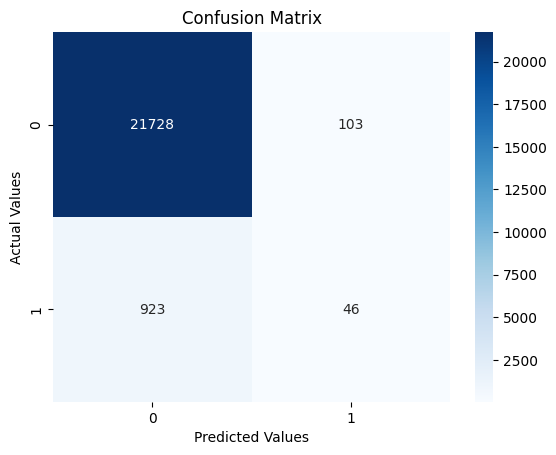

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_knn)
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_test_pred_knn)
prediction_error = 1 - accuracy
print("Accuracy:", accuracy)
print("Prediction Error:", prediction_error)

Accuracy: 0.955
Prediction Error: 0.04500000000000004


In [ ]:
TP = cm[1, 1] # true positives
FP = cm[0, 1] # false positives
TN = cm[0, 0] # true negatives
FN = cm[1, 0] # false negatives

# TPR = true positive / (true positives + false negatives)
# TNR = true negative / (true negatives + false positives)
TPR = TP / (TP + FN) if (TP + FN) != 0 else 0 # true positive rate
TNR = TN / (TN + FP) if (TN + FP) != 0 else 0 # true negative rate

print("True Positive Rate (TPR):", TPR)
print("True Negative Rate (TNR):", TNR)

True Positive Rate (TPR): 0.047471620227038186
True Negative Rate (TNR): 0.9952819385277816


In [ ]:
# Classification Report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_test_pred_knn))

Classification Report:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98     21831
        True       0.31      0.05      0.08       969

    accuracy                           0.95     22800
   macro avg       0.63      0.52      0.53     22800
weighted avg       0.93      0.95      0.94     22800



AUC: 0.8009043246604145


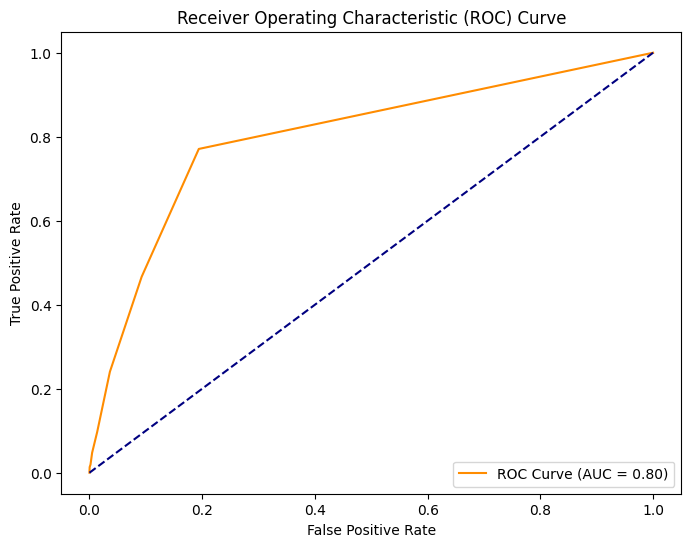

In [ ]:
y_test_prob = knn.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

print("AUC:", roc_auc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest Prediction

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test)

pred_val_rf = pd.DataFrame({
    'true': y_test,
    'rf_predict': y_rf_pred
})

pred_val_rf.head()

true  rf_predict
101240  False       False
53704    True        True
18405   False       False
36128   False       False
96574   False       False

[[21781    50]
 [  409   560]]


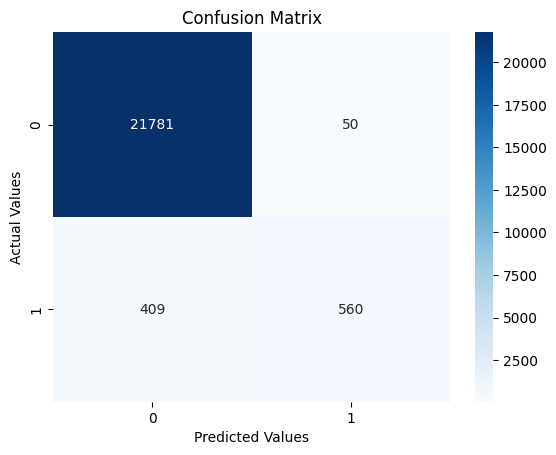

Accuracy: 0.9798684210526316
True Positive Rate: 0.5779153766769866
True Negative Rate: 0.9977096788969814


In [ ]:
# Confusion Matrix
conf_rf = metrics.confusion_matrix(y_true=pred_val_rf['true'],
                                   y_pred=pred_val_rf['rf_predict'])
print(conf_rf)

sns.heatmap(conf_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

# Confusion Matrix Metrics
rf_accuracy = metrics.accuracy_score(y_true=pred_val_rf['true'],
                       y_pred=pred_val_rf['rf_predict'])

rf_truepositive = metrics.recall_score(y_true=pred_val_rf['true'],
                       y_pred=pred_val_rf['rf_predict'])

rf_truenegative = metrics.recall_score(y_true=pred_val_rf['true'],
                       y_pred=pred_val_rf['rf_predict'],
                                       pos_label=0)

print('Accuracy:', rf_accuracy)
print('True Positive Rate:', rf_truepositive)
print('True Negative Rate:', rf_truenegative)

In [ ]:
y_rf_pred_proba = rf.predict_proba(X_test)[:, 1]

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, y_rf_pred_proba)

roc_rf_sample = pd.DataFrame({
    'False Positive Rate': rf_fpr,
    'True Positive Rate': rf_tpr,
    'Model': 'Random Forest'
}, index= rf_thresholds)

roc_rf_df = pd.concat([roc_rf_sample])

px.line(roc_rf_df, y='True Positive Rate', x='False Positive Rate',
        color='Model',
        width=700, height=500
)

In [ ]:
# AUC
rf_auc_sample = metrics.roc_auc_score(pred_val_rf['true'], pred_val_rf['rf_predict'])
print('Random Forest AUC:', rf_auc_sample.round(3))

Random Forest AUC: 0.788


In [ ]:
impurity_importance_df = pd.DataFrame({
    'variable': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)
impurity_importance_df

variable  importance
8             tempo    0.123107
2          loudness    0.123037
4      acousticness    0.117640
3       speechiness    0.114575
7           valence    0.112262
0      danceability    0.109429
1            energy    0.109047
6          liveness    0.108879
5  instrumentalness    0.082024

# PCA and Clustering

In [ ]:
# fit PCA model
pca = PCA(n_components=9, svd_solver='full')
pca_result = pca.fit_transform(X_train)

print(pca_result.shape)

(91199, 9)


In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'], index=X_train.columns)
print(loadings)

                       PC1       PC2       PC3       PC4       PC5       PC6  \
danceability     -0.000286  0.009785 -0.119691  0.290268  0.277787 -0.203729   
energy            0.002112  0.036985  0.255700  0.283531 -0.067479  0.285713   
loudness          0.036709  0.997392 -0.005217 -0.051626  0.026798 -0.004428   
speechiness       0.000059  0.001312 -0.020621  0.019888 -0.023443  0.144185   
acousticness     -0.002346 -0.037677 -0.558743 -0.614049  0.404237  0.178071   
instrumentalness -0.000551 -0.027403  0.686940 -0.210464  0.676575  0.107647   
liveness          0.000011  0.003208 -0.006514 -0.003280 -0.173807  0.885069   
valence           0.000692  0.014388 -0.368396  0.641040  0.515406  0.171493   
tempo             0.999321 -0.036827 -0.001059 -0.000622  0.000206 -0.000159   

                       PC7       PC8       PC9  
danceability      0.814517  0.189243 -0.288793  
energy           -0.290977  0.688874 -0.455473  
loudness          0.003477 -0.016786  0.011737  
spe

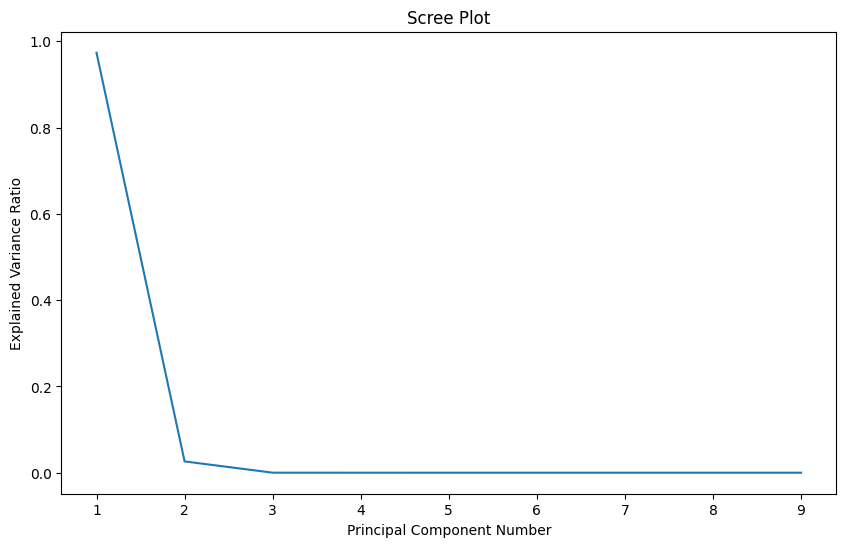

[9.73426522e-01 2.62364567e-02 1.12333745e-04 7.79294837e-05
 5.84044684e-05 4.28247007e-05 2.14513234e-05 1.48716756e-05
 9.20634117e-06]


In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

print(explained_variance_ratio)

Choose the first two PCs because they cover the most variance.

In [ ]:
two_pc = pca_result[:, :2]
two_pc_df = pd.DataFrame(two_pc, columns=['PC1', 'PC2'])

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(two_pc_df)

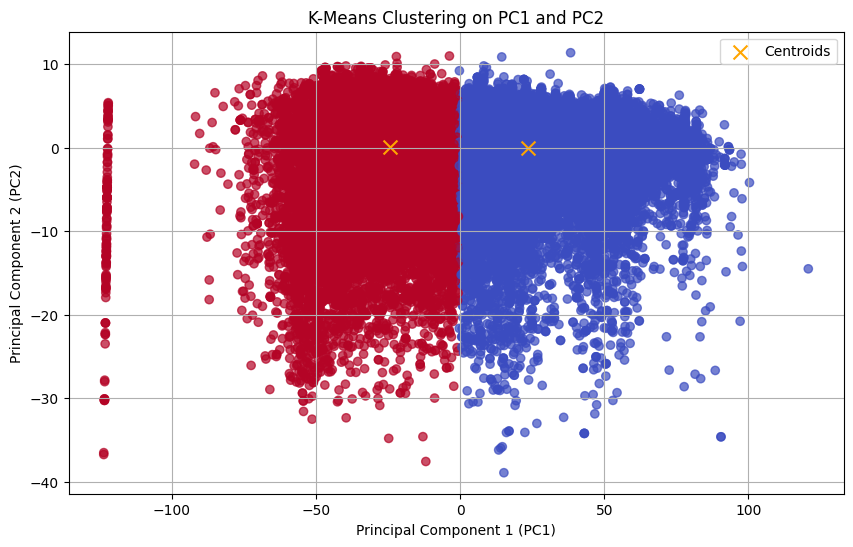

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='coolwarm', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='orange', marker='x', s=100, label='Centroids')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('K-Means Clustering on PC1 and PC2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
cluster_labels = kmeans.labels_
cluster_profiles = X_train.copy()
cluster_profiles['Cluster'] = cluster_labels
print(cluster_profiles.groupby('Cluster').mean())

         danceability    energy  loudness  speechiness  acousticness  \
Cluster                                                                
0            0.560599  0.691180 -7.486946     0.083551      0.252104   
1            0.572782  0.589403 -9.067659     0.085782      0.379886   

         instrumentalness  liveness   valence       tempo  
Cluster                                                    
0                0.158390  0.214206  0.481422  145.777001  
1                0.154337  0.212005  0.466367   97.760232  


In [ ]:
kmeans.fit(pca_result)
kmeans.inertia_

31710185.583244678

In [ ]:
from scipy.stats import chi2_contingency

pca_df = pd.DataFrame(pca_result[:, :2], columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

pca_df['Popularity'] = y_train.values

popularity_counts = pca_df.groupby('Cluster')['Popularity'].value_counts().unstack().fillna(0)
print("Popularity Counts per Cluster:")
print(popularity_counts)

popularity_proportion = popularity_counts.div(popularity_counts.sum(axis=1), axis=0)
print("\nProportion of Popular Songs per Cluster:")
print(popularity_proportion)

chi2, p, dof, expected = chi2_contingency(popularity_counts)
print(f"Chi-Square Statistic: {chi2:.2f}, P-value: {p:.4f}")

Popularity Counts per Cluster:
Popularity  False  True 
Cluster                 
0           44537   1789
1           42785   2088

Proportion of Popular Songs per Cluster:
Popularity     False     True 
Cluster                       
0           0.961382  0.038618
1           0.953469  0.046531
Chi-Square Statistic: 34.88, P-value: 0.0000


P value is significant. Meaning the difference between the clusters are significant and that cluster 0 could be related to popularity and cluster 1 unpopularity.

# Neural Networks

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
X_train_scaled, X_test_scaled = torch.tensor(X_train_scaled).float(), torch.tensor(X_test_scaled).float()
y_train, y_test = torch.tensor(y_train.values).long(), torch.tensor(y_test.values).long()

Our model is defined to have 2 layers: 1) a hidden layer with 128 nodes that takes in 14 feature inputs and 2) an output layer with 2 nodes classifying our data points as either popular or not. It also contains a forward method that specifies how our data flows through the neural network.

In [ ]:
class NN(nn.Module):
  def __init__(self):
    super(NN, self).__init__()
    self.layer = nn.Linear(9, 128)
    self.output = nn.Linear(128, 2)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.layer(x)
    x = F.relu(x)
    x = self.output(x)
    x = self.sigmoid(x)
    return x

In [ ]:
loss_fn = nn.CrossEntropyLoss()
model = NN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = [1, 5, 10 ,25, 50]
learning_rates = [0.0005, 0.001, 0.005, 0.01]
for learning_rate in learning_rates:
  for epoch in epochs:
    print(f"Learning rate: {learning_rate} ~ Epochs: {epoch}")
    model = NN()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    for e in range(epoch):
        #Forward pass: generate predictions for X_train
        predictions = model(X_train_scaled)
        loss = loss_fn(predictions, y_train) #compute loss
        #Backward pass: compute gradients of loss
        optimizer.zero_grad() #reset gradients
        loss.backward() #backwards pass
        optimizer.step() #update weights
    with torch.no_grad():
        predictions = torch.argmax(model(X_test_scaled),dim=-1)
    print(sum(predictions == y_test)/len(y_test))

Learning rate: 0.0005 ~ Epochs: 1
tensor(0.6776)
Learning rate: 0.0005 ~ Epochs: 5
tensor(0.5164)
Learning rate: 0.0005 ~ Epochs: 10
tensor(0.9516)
Learning rate: 0.0005 ~ Epochs: 25
tensor(0.9575)
Learning rate: 0.0005 ~ Epochs: 50
tensor(0.9575)
Learning rate: 0.001 ~ Epochs: 1
tensor(0.5544)
Learning rate: 0.001 ~ Epochs: 5
tensor(0.7836)
Learning rate: 0.001 ~ Epochs: 10
tensor(0.9573)
Learning rate: 0.001 ~ Epochs: 25
tensor(0.9575)
Learning rate: 0.001 ~ Epochs: 50
tensor(0.9575)
Learning rate: 0.005 ~ Epochs: 1
tensor(0.5628)
Learning rate: 0.005 ~ Epochs: 5
tensor(0.9575)
Learning rate: 0.005 ~ Epochs: 10
tensor(0.9575)
Learning rate: 0.005 ~ Epochs: 25
tensor(0.9575)
Learning rate: 0.005 ~ Epochs: 50
tensor(0.9575)
Learning rate: 0.01 ~ Epochs: 1
tensor(0.9575)
Learning rate: 0.01 ~ Epochs: 5
tensor(0.9575)
Learning rate: 0.01 ~ Epochs: 10
tensor(0.9575)
Learning rate: 0.01 ~ Epochs: 25
tensor(0.9575)
Learning rate: 0.01 ~ Epochs: 50
tensor(0.9575)


In [ ]:
# Initialization
loss_fn = nn.CrossEntropyLoss() # using cross-entropy loss for a classification model
model = NN() # initializing our model
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
epochs = 100
for e in range(epochs):
      #Forward pass: generate predictions for X_train
        predictions = model(X_train_scaled)
        loss = loss_fn(predictions, y_train) #compute loss
        #Backward pass: compute gradients of loss
        optimizer.zero_grad() #reset gradients
        loss.backward() #backwards pass
        optimizer.step() #update weights
        #Print loss
        print(f"Epoch {e+1}/{epochs} - Loss: {loss.item()}")


Epoch 1/100 - Loss: 0.7060350179672241
Epoch 2/100 - Loss: 0.6642802357673645
Epoch 3/100 - Loss: 0.6258838176727295
Epoch 4/100 - Loss: 0.5911251306533813
Epoch 5/100 - Loss: 0.5600510835647583
Epoch 6/100 - Loss: 0.5325254201889038
Epoch 7/100 - Loss: 0.508296012878418
Epoch 8/100 - Loss: 0.4870665669441223
Epoch 9/100 - Loss: 0.4685344994068146
Epoch 10/100 - Loss: 0.4524134397506714
Epoch 11/100 - Loss: 0.43843892216682434
Epoch 12/100 - Loss: 0.4263688325881958
Epoch 13/100 - Loss: 0.41598376631736755
Epoch 14/100 - Loss: 0.407084196805954
Epoch 15/100 - Loss: 0.3994870185852051
Epoch 16/100 - Loss: 0.393026202917099
Epoch 17/100 - Loss: 0.3875505030155182
Epoch 18/100 - Loss: 0.38292330503463745
Epoch 19/100 - Loss: 0.37902262806892395
Epoch 20/100 - Loss: 0.375739723443985
Epoch 21/100 - Loss: 0.3729797899723053
Epoch 22/100 - Loss: 0.37065982818603516
Epoch 23/100 - Loss: 0.368708997964859
Epoch 24/100 - Loss: 0.36706671118736267
Epoch 25/100 - Loss: 0.365681916475296
Epoch 26/

In [ ]:
# check test performance
with torch.no_grad():
  predictions = torch.argmax(model(X_test_scaled),dim = -1)
print(sum(predictions == y_test)/len(y_test))

tensor(0.9575)


confusion matrix and ROC curve to visualize results

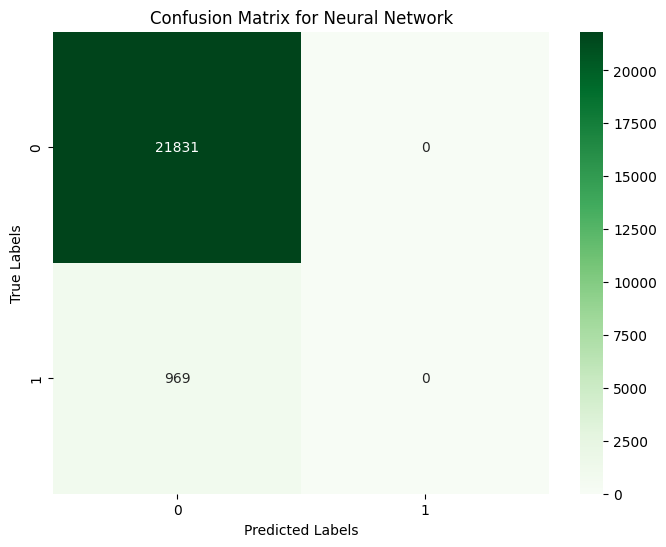

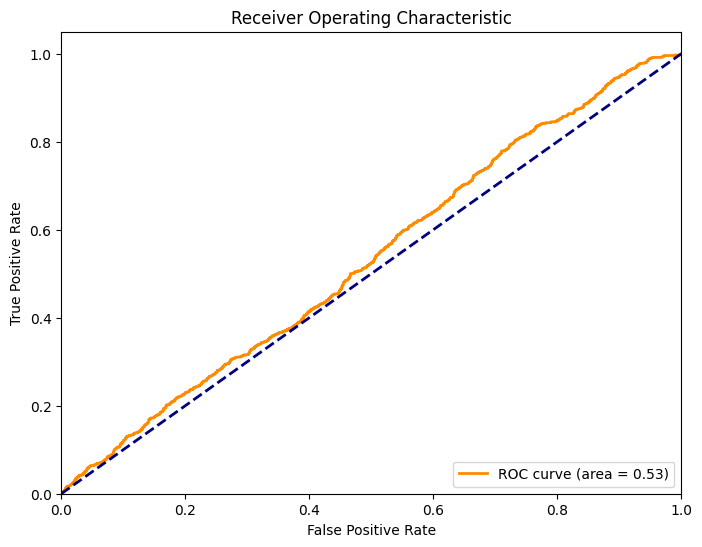

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch
# Calculate the confusion matrix
with torch.no_grad():
  predictions = torch.argmax(model(X_test_scaled), dim = -1)
cm = confusion_matrix(y_test.detach().numpy(), predictions.detach().numpy())
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix for Neural Network")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
# Plot the ROC curve (requires probabilities)
from sklearn.metrics import roc_curve, auc
with torch.no_grad():
    probabilities = model(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()